In [1]:
import json
import csv
import os
import time
import psutil  
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import squarify

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# Data Engineering, Cleaning, and Management

In [2]:
# Read CSV file and convert to DataFrame
df = pd.read_csv('../data/processed_sports_facilities_11.csv')

# Display basic information about the DataFrame
print("DataFrame shape:", df.shape)
print("\nFirst 5 rows of data:")
print(df.head())

DataFrame shape: (611253, 7)

First 5 rows of data:
                        _id  bookingID               bookingDate placeCode  \
0  63b1380f87456b94c60a393d   83943689  2022-12-31T16:00:00.000Z      HSQ1   
1  63b1380f87456b94c60a3949   83955369  2022-12-31T16:00:00.000Z    HSQ1~3   
2  62d692bd87456b94c67b7075   84083857  2022-12-31T16:00:00.000Z     HTEN5   
3  62d6928787456b94c677000f   83943701  2022-12-31T16:00:00.000Z      HSQ1   
4  62d6928887456b94c677237c   83955381  2022-12-31T16:00:00.000Z    HSQ1~3   

   timeSlot bookingStatus          lastModifiedDate  
0        11             O  2023-01-01T02:53:48.000Z  
1        11             P  2023-01-01T02:53:48.000Z  
2        15             O  2023-01-01T06:15:27.000Z  
3        17             O  2023-01-01T06:32:35.000Z  
4        17             P  2023-01-01T06:32:35.000Z  


In [3]:
# 1. First, print all unique values of bookingStatus
print("=== All unique values of bookingStatus ===")
unique_booking_status = df['bookingStatus'].unique()
print(f"bookingStatus has {len(unique_booking_status)} unique values:")
for i, status in enumerate(sorted(unique_booking_status), 1):
    print(f"{i}. '{status}'")

=== All unique values of bookingStatus ===
bookingStatus has 8 unique values:
1. 'A'
2. 'F'
3. 'H'
4. 'O'
5. 'P'
6. 'R'
7. 'U'
8. 'X'


In [4]:
# Count the number of each status
print("\n=== Count of each bookingStatus ===")
status_counts = df['bookingStatus'].value_counts()
for status, count in status_counts.items():
    print(f"'{status}': {count} records")


=== Count of each bookingStatus ===
'A': 406939 records
'X': 111089 records
'F': 24434 records
'R': 21934 records
'O': 17603 records
'P': 15719 records
'H': 8905 records
'U': 4630 records


In [5]:
# 2. Print all unique values of placeCode
print("\n\n=== All unique values of placeCode ===")
unique_place_codes = df['placeCode'].unique()
print(f"placeCode has {len(unique_place_codes)} unique values:")



=== All unique values of placeCode ===
placeCode has 92 unique values:


In [6]:
# Since placeCode may have many values, we display them in groups
# First sort by character length, then display
place_codes_sorted = sorted(unique_place_codes, key=lambda x: (len(x), x))

# Display grouped by character length
from collections import defaultdict
place_codes_by_length = defaultdict(list)

for code in place_codes_sorted:
    place_codes_by_length[len(code)].append(code)

# Print placeCode grouped by length
for length in sorted(place_codes_by_length.keys()):
    codes = place_codes_by_length[length]
    print(f"\n--- placeCode with length {length} ({len(codes)} items) ---")
    
    # Display 5 per line to avoid overly long output
    for i in range(0, len(codes), 5):
        chunk = codes[i:i+5]
        print("  ".join([f"'{code}'" for code in chunk]))


--- placeCode with length 2 (2 items) ---
'N9'  'VB'

--- placeCode with length 3 (16 items) ---
'BA1'  'BA2'  'BA3'  'BA4'  'BA5'
'BA6'  'BA7'  'BA8'  'BA9'  'HAR'
'HBC'  'HBH'  'HBW'  'HDR'  'HSP'
'HTH'

--- placeCode with length 4 (38 items) ---
'1FCA'  'BA10'  'BA11'  'BA12'  'BA13'
'BA14'  'HATR'  'HBC1'  'HBC2'  'HBC3'
'HBC4'  'HBC5'  'HBC6'  'HBC7'  'HBC8'
'HGYM'  'HLBG'  'HMPR'  'HMSP'  'HPAV'
'HSCW'  'HSQ1'  'HSQ2'  'HSQ3'  'HSQ4'
'HSQ5'  'HTC1'  'HTC2'  'HTT1'  'HTT2'
'HTT3'  'HTT4'  'HTT5'  'HTT6'  'HTT7'
'HTT8'  'HTT9'  'HTTR'

--- placeCode with length 5 (23 items) ---
'BA1_2'  'BA3_5'  'BA6_7'  'BA8_9'  'HSPL0'
'HSPL1'  'HSPL2'  'HSPL3'  'HSPL4'  'HSPL5'
'HSPL6'  'HSPL7'  'HSPL8'  'HSPL9'  'HTEN1'
'HTEN2'  'HTEN3'  'HTEN4'  'HTEN5'  'HTEN6'
'HTEN7'  'HTEN8'  'HTEN9'

--- placeCode with length 6 (5 items) ---
'HBC5~8'  'HSQ1~3'  'HTT1~4'  'HTT5~9'  'N9_Run'

--- placeCode with length 7 (6 items) ---
'BA10_11'  'BA12_14'  'HSCW_BW'  'HTEN1_3'  'HTEN4_6'
'HTEN7_9'

--- plac

In [7]:
# If there are too many placeCodes, use a more compact display method
if len(unique_place_codes) > 100:
    print(f"\nplaceCode has {len(unique_place_codes)} unique values, using compact display due to large quantity:")
    
    # Display grouped by pattern
    print("\n=== placeCode grouped by pattern ===")
    
    # Letters only
    letter_only = [code for code in unique_place_codes if re.match(r'^[A-Za-z]+$', code)]
    if letter_only:
        print(f"\nLetter-only placeCode ({len(letter_only)} items):")
        print(sorted(letter_only))
    
    # Letters + numbers
    letter_digit = [code for code in unique_place_codes if re.match(r'^[A-Za-z]+\d+$', code)]
    if letter_digit:
        print(f"\nLetter+number placeCode ({len(letter_digit)} items, showing first 50):")
        print(sorted(letter_digit)[:50])
        if len(letter_digit) > 50:
            print(f"... and {len(letter_digit)-50} more")
    
    # Contains tilde
    with_tilde = [code for code in unique_place_codes if '~' in code]
    if with_tilde:
        print(f"\nplaceCode containing tilde(~) ({len(with_tilde)} items):")
        print(sorted(with_tilde))
    
    # Contains hyphen
    with_hyphen = [code for code in unique_place_codes if '-' in code]
    if with_hyphen:
        print(f"\nplaceCode containing hyphen(-) ({len(with_hyphen)} items):")
        print(sorted(with_hyphen))
    
    # Other patterns
    other_patterns = [code for code in unique_place_codes 
                     if not re.match(r'^[A-Za-z]+\d*$', code) and '~' not in code and '-' not in code]
    if other_patterns:
        print(f"\nplaceCode with other patterns ({len(other_patterns)} items):")
        print(sorted(other_patterns))
else:
    # If quantity is small, display all directly
    print("\nAll unique placeCode values:")
    for i, code in enumerate(sorted(unique_place_codes), 1):
        print(f"{i}. '{code}'")


All unique placeCode values:
1. '1FCA'
2. 'BA1'
3. 'BA10'
4. 'BA10_11'
5. 'BA11'
6. 'BA12'
7. 'BA12_14'
8. 'BA13'
9. 'BA14'
10. 'BA1_2'
11. 'BA2'
12. 'BA3'
13. 'BA3_5'
14. 'BA4'
15. 'BA5'
16. 'BA6'
17. 'BA6_7'
18. 'BA7'
19. 'BA8'
20. 'BA8_9'
21. 'BA9'
22. 'HAR'
23. 'HATR'
24. 'HBC'
25. 'HBC1'
26. 'HBC2'
27. 'HBC3'
28. 'HBC4'
29. 'HBC5'
30. 'HBC5~8'
31. 'HBC6'
32. 'HBC7'
33. 'HBC8'
34. 'HBH'
35. 'HBW'
36. 'HDR'
37. 'HGYM'
38. 'HLBG'
39. 'HMPR'
40. 'HMSP'
41. 'HPAV'
42. 'HSCW'
43. 'HSCW_BW'
44. 'HSP'
45. 'HSPL0'
46. 'HSPL1'
47. 'HSPL2'
48. 'HSPL3'
49. 'HSPL4'
50. 'HSPL5'
51. 'HSPL6'
52. 'HSPL7'
53. 'HSPL8'
54. 'HSPL9'
55. 'HSQ1'
56. 'HSQ1~3'
57. 'HSQ2'
58. 'HSQ3'
59. 'HSQ4'
60. 'HSQ5'
61. 'HTC1'
62. 'HTC2'
63. 'HTEN1'
64. 'HTEN1_3'
65. 'HTEN2'
66. 'HTEN3'
67. 'HTEN4'
68. 'HTEN4_6'
69. 'HTEN5'
70. 'HTEN6'
71. 'HTEN7'
72. 'HTEN7_9'
73. 'HTEN8'
74. 'HTEN9'
75. 'HTH'
76. 'HTT1'
77. 'HTT1~4'
78. 'HTT2'
79. 'HTT3'
80. 'HTT4'
81. 'HTT5'
82. 'HTT5~9'
83. 'HTT6'
84. 'HTT7'
85. 'HTT8'
86. 'HTT9'


### Obtained the meaning of placecode and the meaning of bookingStatus, and concatenate these meanings together.

In [8]:
# Read the facility information file
facilities_df = pd.read_csv('sport_facilities.csv')

print("=== Facility information file overview ===")
print(f"Number of facilities: {len(facilities_df)}")
print(f"Column names: {list(facilities_df.columns)}")

print("\n=== First 10 rows of facility information ===")
print(facilities_df.head(10))

# Check for duplicate place_code
duplicate_codes = facilities_df['place_code'].duplicated().sum()
print(f"\nNumber of duplicate place_code: {duplicate_codes}")

# Check for missing values
print("\n=== Missing values statistics ===")
print(facilities_df.isnull().sum())

FileNotFoundError: [Errno 2] No such file or directory: 'sport_facilities.csv'

In [ ]:
# Merge facility information with original data
df_with_descriptions = df.merge(
    facilities_df, 
    left_on='placeCode', 
    right_on='place_code', 
    how='left'
)

print("=== Merged data overview ===")
print(f"Merged data shape: {df_with_descriptions.shape}")
print(f"Number of successfully matched facilities: {df_with_descriptions['description'].notna().sum()}")
print(f"Number of unmatched facilities: {df_with_descriptions['description'].isna().sum()}")

# Check unmatched placeCodes
unmatched_codes = df_with_descriptions[df_with_descriptions['description'].isna()]['placeCode'].unique()
print(f"\nUnmatched placeCodes ({len(unmatched_codes)} items):")
for code in sorted(unmatched_codes):
    print(f"  '{code}'")

=== Merged data overview ===
Merged data shape: (611253, 10)
Number of successfully matched facilities: 611253
Number of unmatched facilities: 0

Unmatched placeCodes (0 items):


In [ ]:
# print(df_with_descriptions)

# Data Analysis: Learning, Analytics, Visualization

=== Booking Statistics by Facility Type ===
Top 20 Facilities by Booking Volume:
1. Outdoor Basketball Court 7: 11504 bookings
   Status Distribution: {'A': 9798, 'X': 1462, 'F': 244}
2. Outdoor Basketball Court 6: 11450 bookings
   Status Distribution: {'A': 9739, 'X': 1462, 'F': 244, 'R': 5}
3. Outdoor Basketball Court 6 _ 7: 11445 bookings
   Status Distribution: {'A': 9734, 'X': 1462, 'H': 213, 'R': 31, 'P': 5}
4. Badminton Hall: 8226 bookings
   Status Distribution: {'P': 3205, 'A': 2869, 'X': 1560, 'R': 537, 'H': 54, 'U': 1}
5. Badminton Court 4: 8135 bookings
   Status Distribution: {'A': 3365, 'O': 2179, 'X': 1092, 'R': 840, 'F': 592, 'U': 53, 'H': 14}
6. Fitness Room: 8093 bookings
   Status Distribution: {'A': 5127, 'U': 2227, 'X': 739}
7. Training Court 2(Basketball/VolleyBall): 8090 bookings
   Status Distribution: {'A': 4337, 'R': 1809, 'F': 1574, 'H': 214, 'X': 156}
8. Badminton Court 1 : 8005 bookings
   Status Distribution: {'A': 3113, 'O': 2050, 'X': 1560, 'F': 592, 'R

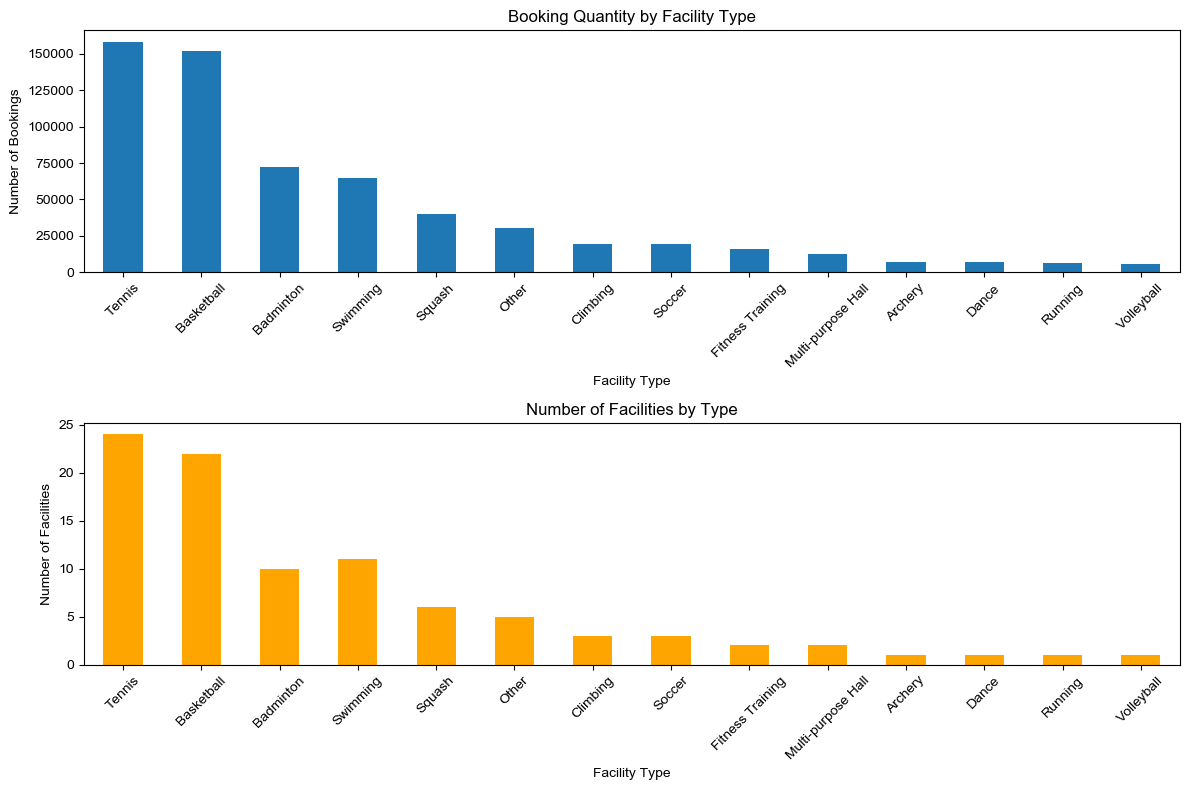

In [ ]:
# Analyze booking situations for various facilities
print("=== Booking Statistics by Facility Type ===")
facility_booking_stats = df_with_descriptions.groupby('description').agg({
    'bookingID': 'count',
    'bookingStatus': lambda x: x.value_counts().to_dict()
}).rename(columns={'bookingID': 'Total Bookings'}).sort_values('Total Bookings', ascending=False)

print("Top 20 Facilities by Booking Volume:")
for i, (facility, stats) in enumerate(facility_booking_stats.head(20).iterrows(), 1):
    status_dist = stats['bookingStatus']
    print(f"{i}. {facility}: {stats['Total Bookings']} bookings")
    print(f"   Status Distribution: {status_dist}")

# Analyze facility type patterns
print("\n=== Facility Type Classification ===")

# Classify facility types based on description information
# This step categorizes different venue names into unified categories for subsequent statistics and visualization
def categorize_facility(description):
    if pd.isna(description):
        return "Unknown"
    description_lower = str(description).lower()
    if 'tennis' in description_lower:
        return 'Tennis'
    elif 'squash' in description_lower:
        return 'Squash'
    elif 'badminton' in description_lower:
        return 'Badminton'
    elif 'basketball' in description_lower:
        return 'Basketball'
    elif 'table tennis' in description_lower:
        return 'Table Tennis'
    elif 'swimming' in description_lower:
        return 'Swimming'
    elif 'soccer' in description_lower:
        return 'Soccer'
    elif 'volleyball' in description_lower:
        return 'Volleyball'
    elif 'climbing' in description_lower or 'bouldering' in description_lower:
        return 'Climbing'
    elif 'fitness' in description_lower or 'training' in description_lower:
        return 'Fitness Training'
    elif 'dance' in description_lower:
        return 'Dance'
    elif 'archery' in description_lower:
        return 'Archery'
    elif 'running' in description_lower:
        return 'Running'
    elif 'multi-purpose' in description_lower or 'activity' in description_lower:
        return 'Multi-purpose Hall'
    else:
        return 'Other'

df_with_descriptions['facility_type'] = df_with_descriptions['description'].apply(categorize_facility)

# Statistics on bookings by facility type
facility_type_stats = df_with_descriptions.groupby('facility_type').agg({
    'bookingID': 'count',
    'placeCode': 'nunique'
}).rename(columns={'bookingID': 'Total Bookings', 'placeCode': 'Number of Facilities'}).sort_values('Total Bookings', ascending=False)

print("Statistics by Facility Type:")
print(facility_type_stats)

# Visualize facility type distribution
plt.figure(figsize=(12, 8))

# 1. Facility type booking distribution
plt.subplot(2, 1, 1)
facility_type_stats['Total Bookings'].plot(kind='bar')
plt.title('Booking Quantity by Facility Type')
plt.xlabel('Facility Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)

# 2. Facility type quantity distribution
plt.subplot(2, 1, 2)
facility_type_stats['Number of Facilities'].plot(kind='bar', color='orange')
plt.title('Number of Facilities by Type')
plt.xlabel('Facility Type')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

=== Preparing Treemap Data ===
                    Total Bookings  Number of Facilities
facility_type                                           
Tennis                      158254                    24
Basketball                  152164                    22
Badminton                    72108                    10
Swimming                     64416                    11
Squash                       39922                     6
Other                        30467                     5
Climbing                     19635                     3
Soccer                       19599                     3
Fitness Training             15773                     2
Multi-purpose Hall           12340                     2
Archery                       7101                     1
Dance                         7098                     1
Running                       6518                     1
Volleyball                    5858                     1


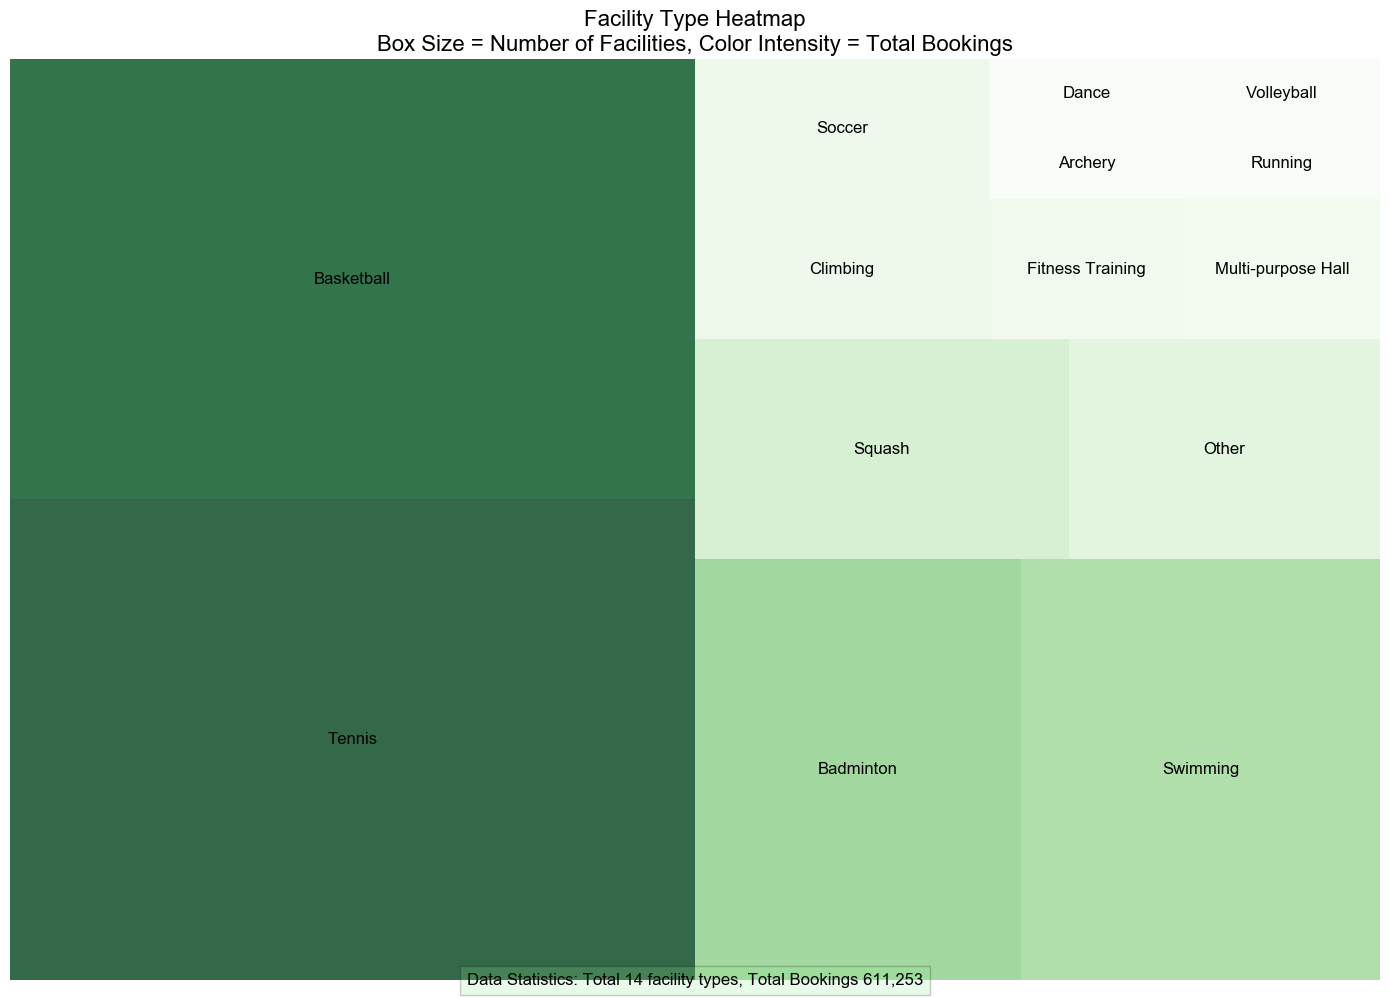

In [ ]:
import squarify
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Use the previously calculated facility_type_stats data
print("=== Preparing Treemap Data ===")
print(facility_type_stats)

# Prepare data for treemap
labels = []
sizes = []  # Box size - Number of Facilities
color_values = [] # Numerical values for color mapping

for facility_type in facility_type_stats.index:
    labels.append(facility_type)
    sizes.append(facility_type_stats.loc[facility_type, 'Number of Facilities'])
    color_values.append(facility_type_stats.loc[facility_type, 'Total Bookings'])

# Create color mapping - using green gradient
norm = mcolors.Normalize(vmin=min(color_values), vmax=max(color_values))
color_map = plt.cm.Greens  # Green color scheme, darker color indicates more bookings

# Create treemap
plt.figure(figsize=(14, 10))

# Create main plot
ax = plt.subplot(111)

# Create treemap
squarify.plot(sizes=sizes, 
              label=labels,
              color=color_map(norm(color_values)),
              alpha=0.8,
              text_kwargs={'fontsize': 12, 'weight': 'bold'},
              ax=ax)

# Add title and description
plt.title('Facility Type Heatmap\nBox Size = Number of Facilities, Color Intensity = Total Bookings', fontsize=16, fontweight='bold')
plt.axis('off')  # Turn off axes

# Add legend description
plt.figtext(0.5, 0.01, 
           f"Data Statistics: Total {len(facility_type_stats)} facility types, Total Bookings {sum(facility_type_stats['Total Bookings']):,}", 
           ha="center", fontsize=12, bbox={"facecolor":"lightgreen", "alpha":0.2, "pad":5})

plt.tight_layout()
plt.show()

In [ ]:
# Detailed analysis of main facility types
print("\n=== Detailed Analysis of Main Facility Types ===")

# Tennis court analysis
tennis_facilities = df_with_descriptions[df_with_descriptions['facility_type'] == 'Tennis']
print(f"Total Tennis Court Bookings: {len(tennis_facilities)}")
print(f"Number of Tennis Courts: {tennis_facilities['placeCode'].nunique()}")
print("Top 10 Tennis Courts by Booking Volume:")
tennis_top = tennis_facilities['description'].value_counts().head(10)
for court, count in tennis_top.items():
    print(f"  {court}: {count}")

# Squash court analysis
squash_facilities = df_with_descriptions[df_with_descriptions['facility_type'] == 'Squash']
print(f"\nTotal Squash Court Bookings: {len(squash_facilities)}")
print(f"Number of Squash Courts: {squash_facilities['placeCode'].nunique()}")
print("Squash Court Booking Statistics:")
squash_stats = squash_facilities['description'].value_counts()
for court, count in squash_stats.items():
    print(f"  {court}: {count}")

# View detailed information of unknown facilities
unknown_facilities = df_with_descriptions[df_with_descriptions['facility_type'] == 'Unknown']
print(f"\nNumber of Unknown Facility Types: {unknown_facilities['placeCode'].nunique()}")
print("Unknown Facility Codes:")
unknown_codes = unknown_facilities['placeCode'].unique()
for code in sorted(unknown_codes):
    count = len(unknown_facilities[unknown_facilities['placeCode'] == code])
    print(f"  '{code}': {count} bookings")


=== Detailed Analysis of Main Facility Types ===
Total Tennis Court Bookings: 158254
Number of Tennis Courts: 24
Top 10 Tennis Courts by Booking Volume:
  Table Tennis Room: 7434
  Table Tennis Court 1 ~ 4: 7202
  Tennis Courts 4_6: 7168
  Table Tennis Court 5 ~ 9: 6918
  Table Tennis Court 1: 6908
  Table Tennis Court 2: 6804
  Tennis Court 5: 6740
  Table Tennis Court 3: 6723
  Tennis Courts 1_3: 6713
  Table Tennis Court 8: 6665

Total Squash Court Bookings: 39922
Number of Squash Courts: 6
Squash Court Booking Statistics:
  Squash Court 1~3: 7478
  Squash Court 1: 7094
  Squash Court 2: 7039
  Squash Court 3: 6503
  Squash Court 4: 5925
  Squash Court 5: 5883

Number of Unknown Facility Types: 0
Unknown Facility Codes:



=== Booking Status Distribution by Facility Type ===
bookingStatus            A      F     H      O      P      R     U       X  \
facility_type                                                                
Archery               4062      0  1524    135      0    648     0     732   
Badminton            18928   4052   370  10371   3845   3559   299   30684   
Basketball          121252   6645  1651      0    509   4028     1   18078   
Climbing             16579   1680   304      0    265    807     0       0   
Dance                 5260      0    71      0      0   1767     0       0   
Fitness Training      8334      0  1018      0   1807    556  2227    1831   
Multi-purpose Hall   11023      0   150      0      0   1167     0       0   
Other                19775      0  1996    339    672   2862    78    4745   
Running               3348    392     0      0      0    381     0    2397   
Soccer               10830    784   795    461      0   1196     7    5526   
Squash    

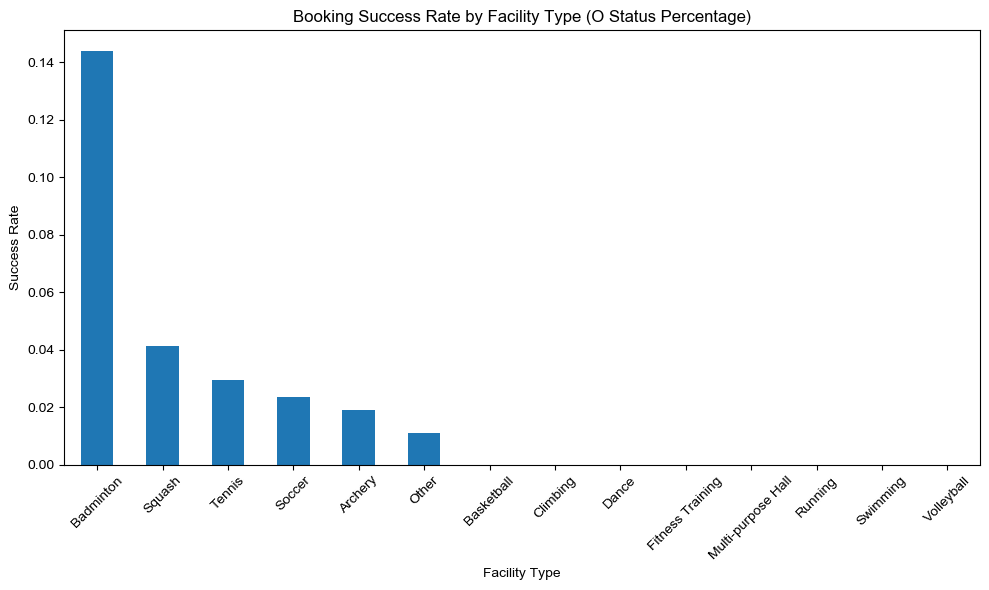

In [ ]:
# Analyze booking status by facility type
print("\n=== Booking Status Distribution by Facility Type ===")
status_by_type = pd.crosstab(
    df_with_descriptions['facility_type'], 
    df_with_descriptions['bookingStatus'],
    margins=True
)
print(status_by_type)

# Calculate booking success rate by facility type (assuming 'O' indicates success)
df_with_descriptions['booking_success'] = df_with_descriptions['bookingStatus'] == 'O'
success_rate_by_type = df_with_descriptions.groupby('facility_type')['booking_success'].mean().sort_values(ascending=False)

print("\n=== Booking Success Rate by Facility Type (O Status Percentage) ===")
for facility_type, rate in success_rate_by_type.items():
    print(f"{facility_type}: {rate:.2%}")

# Visualize booking success rate
plt.figure(figsize=(10, 6))
success_rate_by_type.plot(kind='bar')
plt.title('Booking Success Rate by Facility Type (O Status Percentage)')
plt.xlabel('Facility Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== Complete Analysis of bookingStatus Meanings ===
'A': Available - Available for Booking - 406,939 records (66.57%)
'U': Free Use - Free Use - 4,630 records (0.76%)
'R': Reserved - Reserved - 21,934 records (3.59%)
'H': Hold - On Hold - 8,905 records (1.46%)
'O': Occupied - Occupied/Booked - 17,603 records (2.88%)
'X': Closed - Closed - 111,089 records (18.17%)
'F': Not Available Due to Dependency - Unavailable Due to Dependency - 24,434 records (4.00%)
'P': Not Available Due to Dependency - Unavailable Due to Dependency - 15,719 records (2.57%)
'N': Not Available Due to Priority - Unavailable Due to Priority - 0 records (0.00%)

Total Records: 611,253


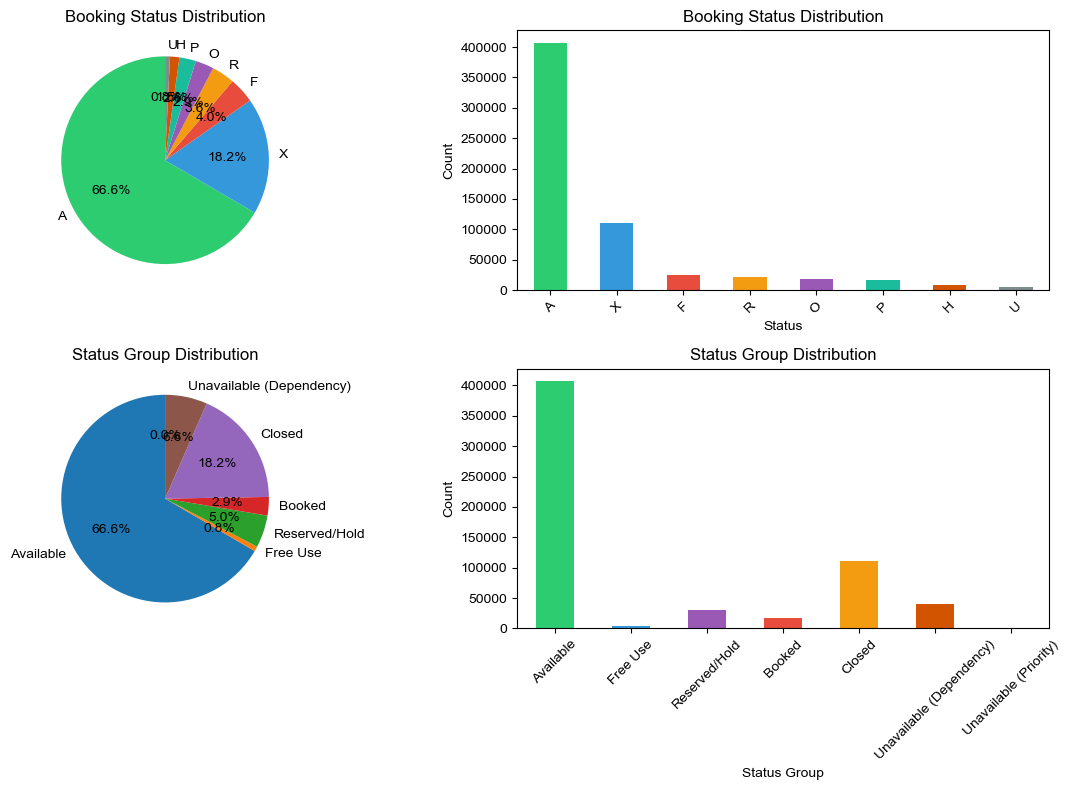

In [ ]:
# Define complete meanings for bookingStatus
booking_status_meanings = {
    'A': 'Available - Available for Booking',
    'U': 'Free Use - Free Use',
    'R': 'Reserved - Reserved',
    'H': 'Hold - On Hold', 
    'O': 'Occupied - Occupied/Booked',
    'X': 'Closed - Closed',
    'F': 'Not Available Due to Dependency - Unavailable Due to Dependency',
    'P': 'Not Available Due to Dependency - Unavailable Due to Dependency',
    'N': 'Not Available Due to Priority - Unavailable Due to Priority'
}

print("=== Complete Analysis of bookingStatus Meanings ===")
for status, meaning in booking_status_meanings.items():
    count = len(df[df['bookingStatus'] == status])
    percentage = (count / len(df)) * 100
    print(f"'{status}': {meaning} - {count:,} records ({percentage:.2f}%)")

# Re-analyze status distribution
status_counts = df['bookingStatus'].value_counts()
print(f"\nTotal Records: {len(df):,}")

# Visualize status distribution
plt.figure(figsize=(12, 8))

# 1. Status distribution pie chart
plt.subplot(2, 2, 1)
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12', '#9b59b6', '#1abc9c', '#d35400', '#7f8c8d', '#c0392b']
status_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Booking Status Distribution')
plt.ylabel('')  # Hide y-axis label

# 2. Status distribution bar chart
plt.subplot(2, 2, 2)
status_counts.plot(kind='bar', color=colors)
plt.title('Booking Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Group analysis by status meaning
status_groups = {
    'Available': ['A'],
    'Free Use': ['U'], 
    'Reserved/Hold': ['R', 'H'],
    'Booked': ['O'],
    'Closed': ['X'],
    'Unavailable (Dependency)': ['F', 'P'],
    'Unavailable (Priority)': ['N']
}

# Calculate group counts
group_counts = {}
for group_name, status_list in status_groups.items():
    total = sum([len(df[df['bookingStatus'] == status]) for status in status_list])
    group_counts[group_name] = total

# 3. Status group pie chart
plt.subplot(2, 2, 3)
group_series = pd.Series(group_counts)
group_series.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Status Group Distribution')
plt.ylabel('')

# 4. Status group bar chart
plt.subplot(2, 2, 4)
group_series.plot(kind='bar', color=['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f39c12', '#d35400', '#7f8c8d'])
plt.title('Status Group Distribution')
plt.xlabel('Status Group')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Combine facility information and status analysis
print("=== Booking Status Analysis by Facility Type ===")

# Ensure we have facility_type column
if 'facility_type' not in df_with_descriptions.columns:
    df_with_descriptions['facility_type'] = df_with_descriptions['description'].apply(categorize_facility)

# Create status group column
def get_status_group(status):
    if status in ['A']:
        return 'Available'
    elif status in ['U']:
        return 'Free Use'
    elif status in ['R', 'H']:
        return 'Reserved/Hold'
    elif status in ['O']:
        return 'Booked'
    elif status in ['X']:
        return 'Closed'
    elif status in ['F', 'P']:
        return 'Unavailable (Dependency)'
    elif status in ['N']:
        return 'Unavailable (Priority)'
    else:
        return 'Unknown'

df_with_descriptions['status_group'] = df_with_descriptions['bookingStatus'].apply(get_status_group)

# Analysis by facility type and status group
status_by_facility = pd.crosstab(
    df_with_descriptions['facility_type'], 
    df_with_descriptions['status_group'],
    margins=True
)

print("Status Distribution by Facility Type:")
print(status_by_facility)

# Calculate booking rate by facility type (percentage of 'O' status)
facility_booking_rates = df_with_descriptions.groupby('facility_type').apply(
    lambda x: (x['bookingStatus'] == 'O').sum() / len(x)
).sort_values(ascending=False)

print("\n=== Actual Booking Rate by Facility Type (O Status Percentage) ===")
for facility_type, rate in facility_booking_rates.items():
    total = len(df_with_descriptions[df_with_descriptions['facility_type'] == facility_type])
    booked = len(df_with_descriptions[(df_with_descriptions['facility_type'] == facility_type) & 
                                     (df_with_descriptions['bookingStatus'] == 'O')])
    print(f"{facility_type}: {rate:.2%} ({booked}/{total})")

# Calculate availability (percentage of 'A' status)
facility_availability = df_with_descriptions.groupby('facility_type').apply(
    lambda x: (x['bookingStatus'] == 'A').sum() / len(x)
).sort_values(ascending=False)

print("\n=== Availability Rate by Facility Type (A Status Percentage) ===")
for facility_type, rate in facility_availability.items():
    total = len(df_with_descriptions[df_with_descriptions['facility_type'] == facility_type])
    available = len(df_with_descriptions[(df_with_descriptions['facility_type'] == facility_type) & 
                                        (df_with_descriptions['bookingStatus'] == 'A')])
    print(f"{facility_type}: {rate:.2%} ({available}/{total})")

=== Booking Status Analysis by Facility Type ===
Status Distribution by Facility Type:
status_group        Available  Booked  Closed  Free Use  Reserved/Hold  \
facility_type                                                            
Archery                  4062     135     732         0           2172   
Badminton               18928   10371   30684       299           3929   
Basketball             121252       0   18078         1           5679   
Climbing                16579       0       0         0           1111   
Dance                    5260       0       0         0           1838   
Fitness Training         8334       0    1831      2227           1574   
Multi-purpose Hall      11023       0       0         0           1317   
Other                   19775     339    4745        78           4858   
Running                  3348       0    2397         0            381   
Soccer                  10830     461    5526         7           1991   
Squash                  2

=== Booking Status Analysis by Time Period ===
Status Distribution by Hour:
status_group  Available  Booked  Closed  Free Use  Reserved/Hold  \
bookingHour                                                        
16               406939   17603  111089      4630          30839   

status_group  Unavailable (Dependency)  
bookingHour                             
16                               40153  


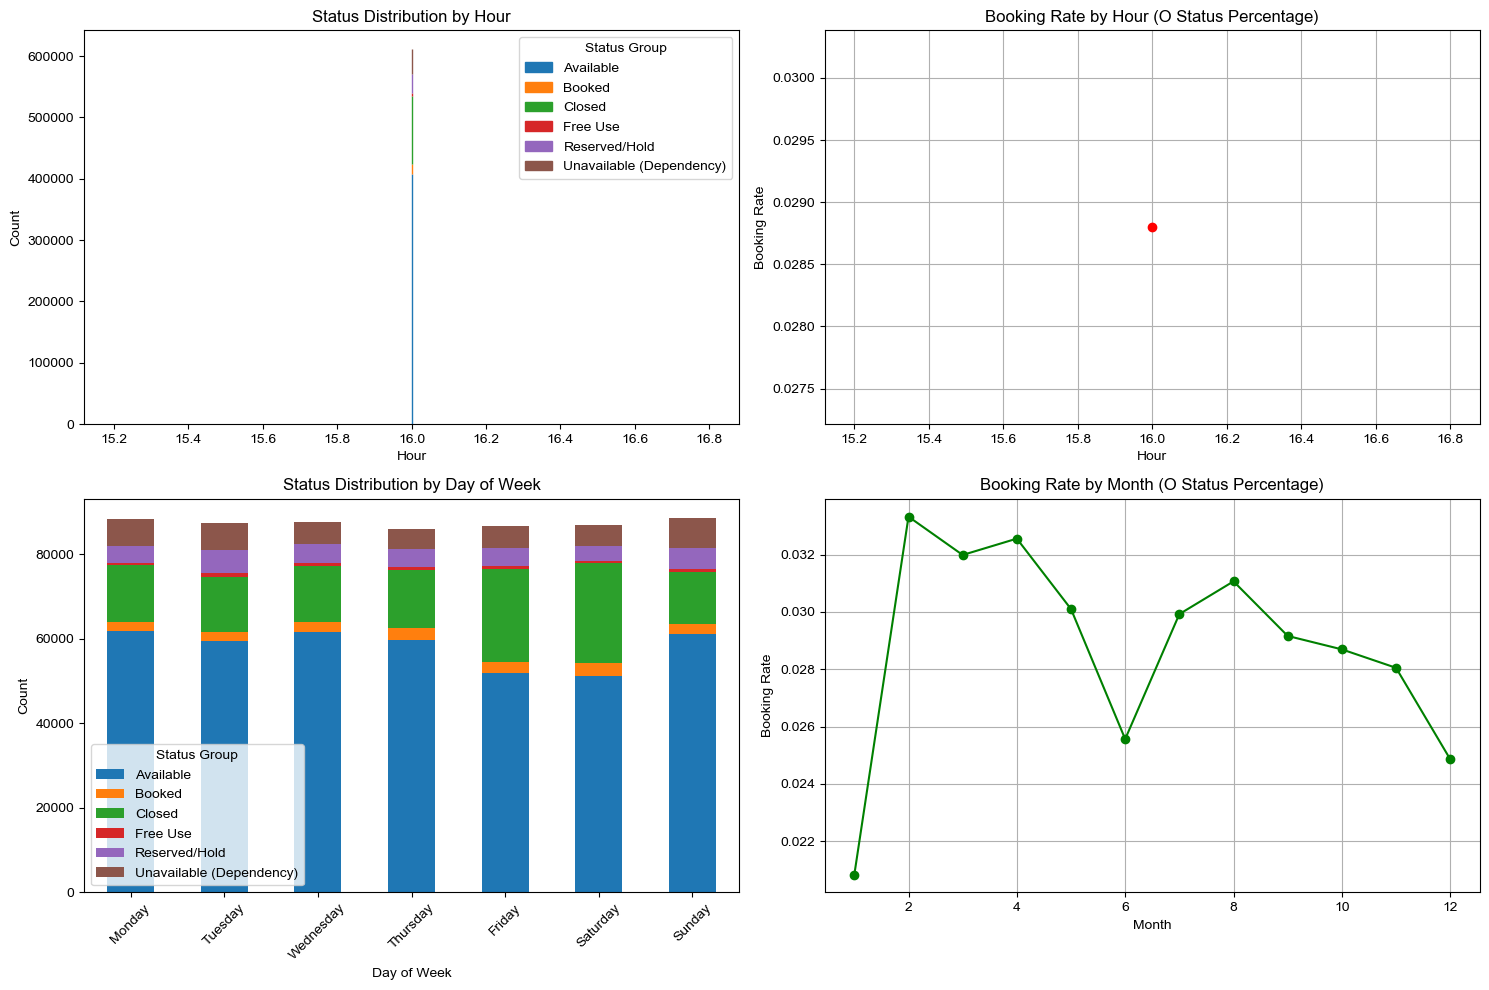

In [ ]:
# Analyze booking status distribution across different time periods
print("=== Booking Status Analysis by Time Period ===")

# Ensure bookingDate is in datetime type
df_with_descriptions['bookingDate'] = pd.to_datetime(df_with_descriptions['bookingDate'])

# Extract time features
df_with_descriptions['bookingHour'] = df_with_descriptions['bookingDate'].dt.hour
df_with_descriptions['bookingDayOfWeek'] = df_with_descriptions['bookingDate'].dt.dayofweek
df_with_descriptions['bookingMonth'] = df_with_descriptions['bookingDate'].dt.month

# Analyze status distribution by hour
hourly_status = pd.crosstab(
    df_with_descriptions['bookingHour'],
    df_with_descriptions['status_group']
)

print("Status Distribution by Hour:")
print(hourly_status)

# Visualize hourly patterns
plt.figure(figsize=(15, 10))

# 1. Status distribution by hour
plt.subplot(2, 2, 1)
hourly_status.plot(kind='area', stacked=True, ax=plt.gca())
plt.title('Status Distribution by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Status Group')

# 2. Booking rate by hour (O status percentage)
plt.subplot(2, 2, 2)
hourly_booking_rate = df_with_descriptions.groupby('bookingHour').apply(
    lambda x: (x['bookingStatus'] == 'O').sum() / len(x)
)
hourly_booking_rate.plot(kind='line', marker='o', color='red')
plt.title('Booking Rate by Hour (O Status Percentage)')
plt.xlabel('Hour')
plt.ylabel('Booking Rate')
plt.grid(True)

# 3. Status distribution by day of week
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_status = pd.crosstab(
    df_with_descriptions['bookingDayOfWeek'],
    df_with_descriptions['status_group']
)
daily_status.index = [day_names[i] for i in daily_status.index]

plt.subplot(2, 2, 3)
daily_status.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Status Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(title='Status Group')
plt.xticks(rotation=45)

# 4. Booking rate by month
plt.subplot(2, 2, 4)
monthly_booking_rate = df_with_descriptions.groupby('bookingMonth').apply(
    lambda x: (x['bookingStatus'] == 'O').sum() / len(x)
)
monthly_booking_rate.plot(kind='line', marker='o', color='green')
plt.title('Booking Rate by Month (O Status Percentage)')
plt.xlabel('Month')
plt.ylabel('Booking Rate')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Analyze status patterns for specific popular facilities
print("=== Popular Facilities Status Analysis ===")

# Find the top 10 facilities with highest booking volume
top_facilities = df_with_descriptions['description'].value_counts().head(10).index

for facility in top_facilities:
    facility_data = df_with_descriptions[df_with_descriptions['description'] == facility]
    total = len(facility_data)
    
    print(f"\n{facility}:")
    print(f"  Total Records: {total}")
    
    # Status distribution
    status_dist = facility_data['bookingStatus'].value_counts()
    for status, count in status_dist.items():
        meaning = booking_status_meanings.get(status, 'Unknown')
        percentage = (count / total) * 100
        print(f"  {status}({meaning}): {count} ({percentage:.1f}%)")
    
    # Booking rate
    booking_rate = (facility_data['bookingStatus'] == 'O').sum() / total
    print(f"  Actual Booking Rate: {booking_rate:.2%}")

# Analyze facility dependency relationships (F/P status)
dependency_issues = df_with_descriptions[df_with_descriptions['bookingStatus'].isin(['F', 'P'])]
print(f"\n=== Facility Dependency Issue Analysis ===")
print(f"Records Unavailable Due to Dependency: {len(dependency_issues)}")

if len(dependency_issues) > 0:
    print("\nFacilities with Most Dependency Issues:")
    dependency_by_facility = dependency_issues['description'].value_counts().head(10)
    for facility, count in dependency_by_facility.items():
        print(f"  {facility}: {count}")
    
    # Analyze time patterns of dependency issues
    print("\nDependency Issues Time Distribution:")
    dependency_by_hour = dependency_issues['bookingHour'].value_counts().sort_index()
    for hour, count in dependency_by_hour.items():
        print(f"  {hour:02d}:00 - {count}")

=== Popular Facilities Status Analysis ===

Outdoor Basketball Court 7:
  Total Records: 11504
  A(Available - Available for Booking): 9798 (85.2%)
  X(Closed - Closed): 1462 (12.7%)
  F(Not Available Due to Dependency - Unavailable Due to Dependency): 244 (2.1%)
  Actual Booking Rate: 0.00%

Outdoor Basketball Court 6:
  Total Records: 11450
  A(Available - Available for Booking): 9739 (85.1%)
  X(Closed - Closed): 1462 (12.8%)
  F(Not Available Due to Dependency - Unavailable Due to Dependency): 244 (2.1%)
  R(Reserved - Reserved): 5 (0.0%)
  Actual Booking Rate: 0.00%

Outdoor Basketball Court 6 _ 7:
  Total Records: 11445
  A(Available - Available for Booking): 9734 (85.1%)
  X(Closed - Closed): 1462 (12.8%)
  H(Hold - On Hold): 213 (1.9%)
  R(Reserved - Reserved): 31 (0.3%)
  P(Not Available Due to Dependency - Unavailable Due to Dependency): 5 (0.0%)
  Actual Booking Rate: 0.00%

Badminton Hall:
  Total Records: 8226
  P(Not Available Due to Dependency - Unavailable Due to Depend

#### The current usage status of all venues and the partial usage status of the top 5 venues.

=== Booking Count Statistics by Time Slot ===
Time Slot  7:00 -  35411 bookings
Time Slot  8:00 -  36305 bookings
Time Slot  9:00 -  37638 bookings
Time Slot 10:00 -  38070 bookings
Time Slot 11:00 -  37977 bookings
Time Slot 12:00 -  37406 bookings
Time Slot 13:00 -  37932 bookings
Time Slot 14:00 -  38008 bookings
Time Slot 15:00 -  38680 bookings
Time Slot 16:00 -  38795 bookings
Time Slot 17:00 -  39130 bookings
Time Slot 18:00 -  39255 bookings
Time Slot 19:00 -  39932 bookings
Time Slot 20:00 -  40230 bookings
Time Slot 21:00 -  39508 bookings
Time Slot 22:00 -  36976 bookings


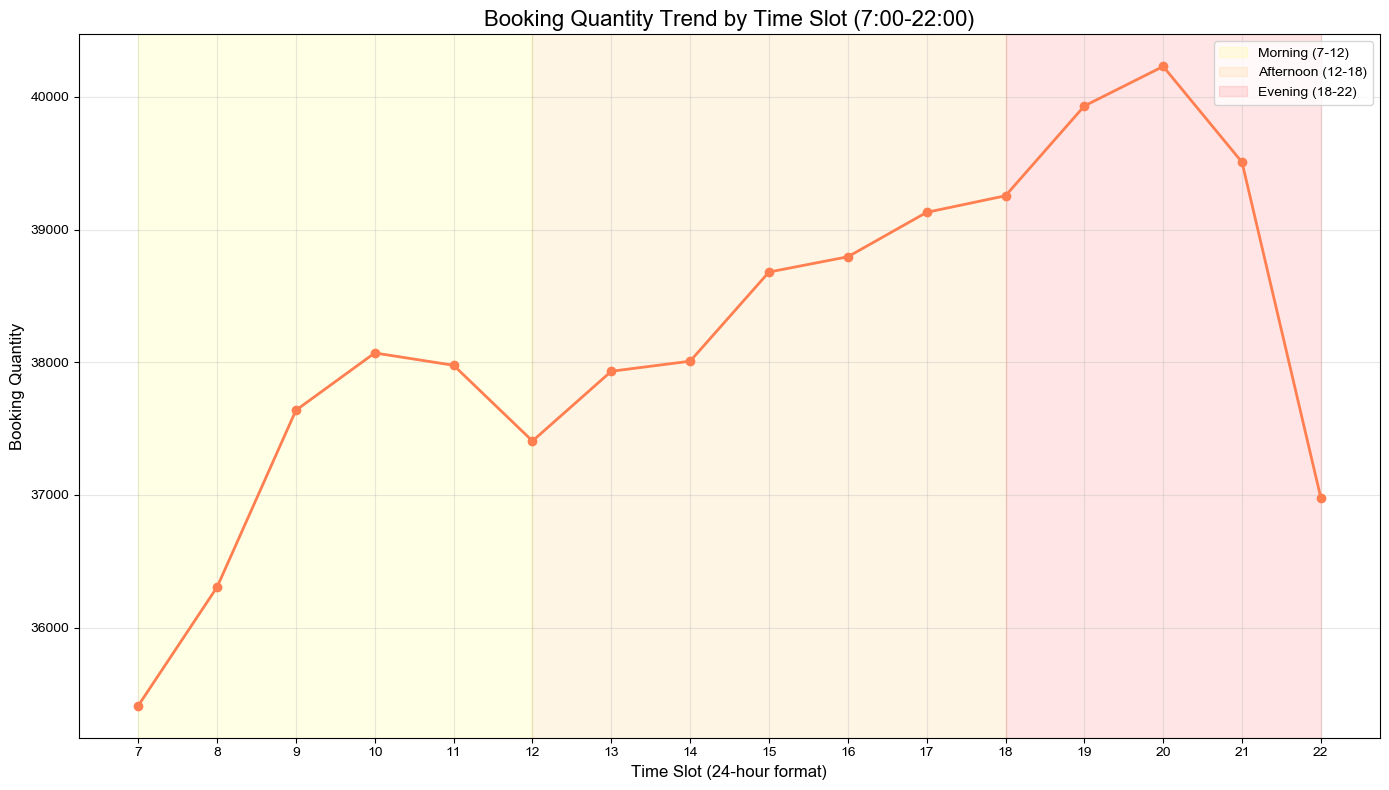


=== Time Slot Booking Statistics Summary (7:00-22:00) ===
Busiest Time Slot: 20:00 (40230 bookings)
Quietest Time Slot: 7:00 (35411 bookings)
Average Bookings per Time Slot: 38203
Total Bookings: 611253

Morning Bookings (7:00-12:00): 193868 (31.7%)
Afternoon Bookings (12:00-18:00): 156646 (25.6%)
Evening Bookings (18:00-22:00): 0 (0.0%)


In [ ]:
# Count bookings for each timeSlot
time_slot_counts = df_with_descriptions['timeSlot'].value_counts().sort_index()

# Ensure all time slots from 7-22 are included, showing 0 even if some time slots have no data
all_time_slots = range(7, 23)  # 7:00 to 22:00
time_slot_counts_full = time_slot_counts.reindex(all_time_slots, fill_value=0)

print("=== Booking Count Statistics by Time Slot ===")
for hour, count in time_slot_counts_full.items():
    print(f"Time Slot {hour:2d}:00 - {count:6d} bookings")

# Create line chart version to show trends more clearly
plt.figure(figsize=(14, 8))

plt.plot(time_slot_counts_full.index, time_slot_counts_full.values, 
         marker='o', linewidth=2, markersize=6, color='coral')

# Set chart properties
plt.title('Booking Quantity Trend by Time Slot (7:00-22:00)', fontsize=16, fontweight='bold')
plt.xlabel('Time Slot (24-hour format)', fontsize=12)
plt.ylabel('Booking Quantity', fontsize=12)
plt.xticks(range(7, 23))
plt.grid(True, alpha=0.3)

# Add background colors to distinguish different time periods
plt.axvspan(7, 12, alpha=0.1, color='yellow', label='Morning (7-12)')
plt.axvspan(12, 18, alpha=0.1, color='orange', label='Afternoon (12-18)')
plt.axvspan(18, 22, alpha=0.1, color='red', label='Evening (18-22)')

# Mark highest and lowest points
max_idx = time_slot_counts_full.idxmax()
min_idx = time_slot_counts_full.idxmin()
# plt.annotate(f'Peak: {time_slot_counts_full[max_idx]} bookings', 
#              xy=(max_idx, time_slot_counts_full[max_idx]),
#              xytext=(max_idx+1, time_slot_counts_full[max_idx]+1000),
#              arrowprops=dict(arrowstyle='->', color='red'),
#              fontsize=12, color='red')

plt.legend()
plt.tight_layout()
plt.show()

# Output statistical summary
print("\n=== Time Slot Booking Statistics Summary (7:00-22:00) ===")
print(f"Busiest Time Slot: {max_idx}:00 ({time_slot_counts_full[max_idx]} bookings)")
print(f"Quietest Time Slot: {min_idx}:00 ({time_slot_counts_full[min_idx]} bookings)")
print(f"Average Bookings per Time Slot: {time_slot_counts_full.mean():.0f}")
print(f"Total Bookings: {time_slot_counts_full.sum()}")

# Calculate booking ratios for different time periods
morning_bookings = time_slot_counts_full[7:12].sum()  # 7:00-12:00
afternoon_bookings = time_slot_counts_full[12:18].sum()  # 12:00-18:00
evening_bookings = time_slot_counts_full[18:23].sum()  # 18:00-22:00

total_bookings = time_slot_counts_full.sum()
print(f"\nMorning Bookings (7:00-12:00): {morning_bookings} ({morning_bookings/total_bookings*100:.1f}%)")
print(f"Afternoon Bookings (12:00-18:00): {afternoon_bookings} ({afternoon_bookings/total_bookings*100:.1f}%)")
print(f"Evening Bookings (18:00-22:00): {evening_bookings} ({evening_bookings/total_bookings*100:.1f}%)")

In [ ]:
print(facility_type_stats)

                    Total Bookings  Number of Facilities
facility_type                                           
Tennis                      158254                    24
Basketball                  152164                    22
Badminton                    72108                    10
Swimming                     64416                    11
Squash                       39922                     6
Other                        30467                     5
Climbing                     19635                     3
Soccer                       19599                     3
Fitness Training             15773                     2
Multi-purpose Hall           12340                     2
Archery                       7101                     1
Dance                         7098                     1
Running                       6518                     1
Volleyball                    5858                     1


# distribute by season



=== Q1 (Jan-Mar) Time Slot Booking Statistics Summary ===
Busiest Time Slot: 15:00 (8983 bookings)
Quietest Time Slot: 7:00 (8676 bookings)
Average Bookings per Time Slot: 8850
Total Bookings: 141608

=== Q2 (Apr-Jun) Time Slot Booking Statistics Summary ===
Busiest Time Slot: 18:00 (9150 bookings)
Quietest Time Slot: 7:00 (8667 bookings)
Average Bookings per Time Slot: 8935
Total Bookings: 142963

=== Q3 (Jul-Sep) Time Slot Booking Statistics Summary ===
Busiest Time Slot: 20:00 (10913 bookings)
Quietest Time Slot: 7:00 (8985 bookings)
Average Bookings per Time Slot: 10037
Total Bookings: 160595

=== Q4 (Oct-Dec) Time Slot Booking Statistics Summary ===
Busiest Time Slot: 20:00 (11504 bookings)
Quietest Time Slot: 7:00 (9083 bookings)
Average Bookings per Time Slot: 10380
Total Bookings: 166087


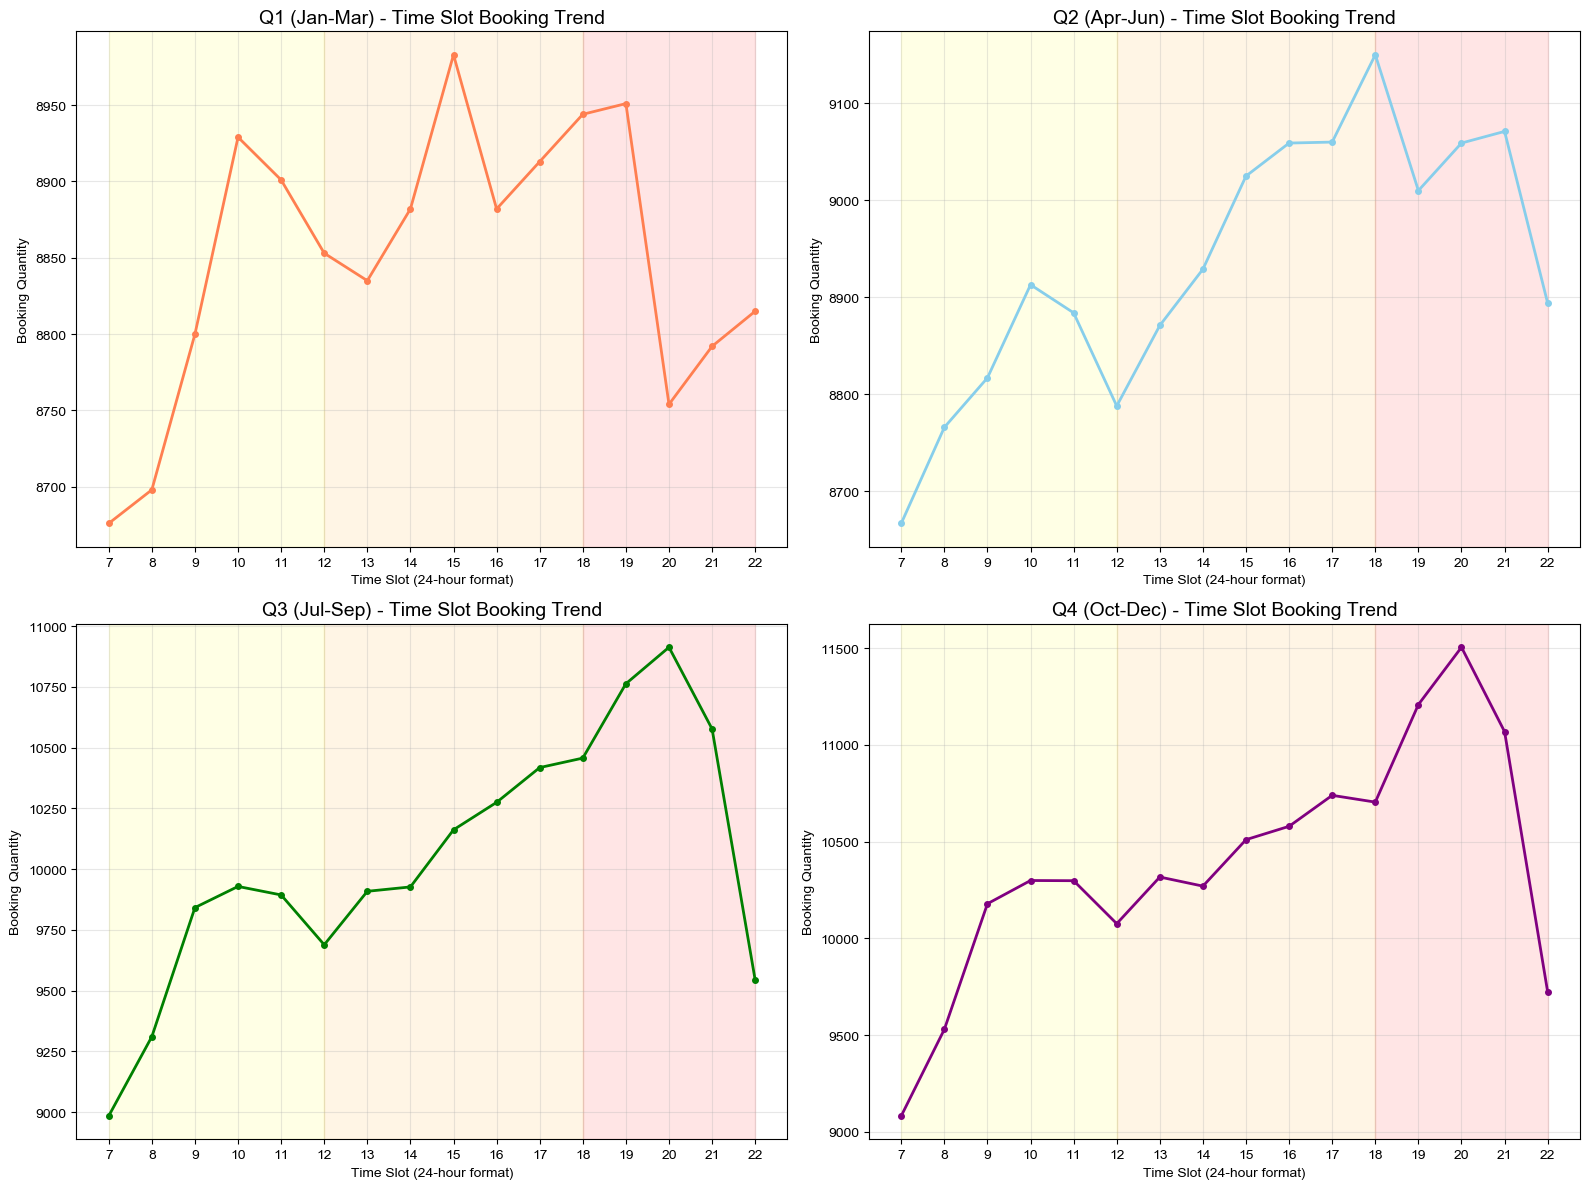

In [ ]:
# Ensure bookingDate is in datetime type
df_with_descriptions['bookingDate'] = pd.to_datetime(df_with_descriptions['bookingDate'])

# Extract month information
df_with_descriptions['month'] = df_with_descriptions['bookingDate'].dt.month

# Define four quarters (3 months each quarter)
seasons = {
    'Q1 (Jan-Mar)': [1, 2, 3],
    'Q2 (Apr-Jun)': [4, 5, 6],
    'Q3 (Jul-Sep)': [7, 8, 9],
    'Q4 (Oct-Dec)': [10, 11, 12]
}

# Create chart with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Draw line charts for each quarter
colors = ['coral', 'skyblue', 'green', 'purple']

for i, (season_name, months) in enumerate(seasons.items()):
    # Filter data for current quarter
    season_data = df_with_descriptions[df_with_descriptions['month'].isin(months)]
    
    # Count bookings for each time slot in this quarter
    season_time_counts = season_data['timeSlot'].value_counts().sort_index()
    
    # Ensure all time slots from 7-22 are included
    season_time_counts_full = season_time_counts.reindex(range(7, 23), fill_value=0)
    
    # Draw line in current subplot
    axes[i].plot(season_time_counts_full.index, season_time_counts_full.values, 
                 marker='o', linewidth=2, markersize=4, color=colors[i])
    
    # Set subplot properties
    axes[i].set_title(f'{season_name} - Time Slot Booking Trend', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Time Slot (24-hour format)', fontsize=10)
    axes[i].set_ylabel('Booking Quantity', fontsize=10)
    axes[i].set_xticks(range(7, 23))
    axes[i].grid(True, alpha=0.3)
    
    # Add background colors to distinguish different time periods
    axes[i].axvspan(7, 12, alpha=0.1, color='yellow')
    axes[i].axvspan(12, 18, alpha=0.1, color='orange')
    axes[i].axvspan(18, 22, alpha=0.1, color='red')
    
    # Mark highest and lowest points
    max_idx = season_time_counts_full.idxmax()
    min_idx = season_time_counts_full.idxmin()
    
    # Output quarterly statistical summary
    print(f"\n=== {season_name} Time Slot Booking Statistics Summary ===")
    print(f"Busiest Time Slot: {max_idx}:00 ({season_time_counts_full[max_idx]} bookings)")
    print(f"Quietest Time Slot: {min_idx}:00 ({season_time_counts_full[min_idx]} bookings)")
    print(f"Average Bookings per Time Slot: {season_time_counts_full.mean():.0f}")
    print(f"Total Bookings: {season_time_counts_full.sum()}")

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

Why does the time fluctuation from January to March vary so significantly and differ from other months?

We speculate two main reasons: first, the weather - January to March are relatively colder months, which may cause different usage patterns compared to other periods.

Second, we have the Spring Festival in February - could this factor be influencing our line chart?

Therefore, the visualization strategy below will distinguish between school term seasons and holiday seasons.


=== School Term (Aug-Nov, Jan, Mar-Apr) Time Slot Booking Statistics Summary ===
Busiest Time Slot: 20:00 (24455 bookings)
Quietest Time Slot: 7:00 (20674 bookings)
Average Bookings per Time Slot: 22783
Total Bookings: 364529
Morning Bookings (7:00-12:00): 115617 (31.7%)
Afternoon Bookings (12:00-18:00): 94293 (25.9%)
Evening Bookings (18:00-22:00): 0 (0.0%)

=== Exam & Holiday Season (May-Jul, Dec, Feb) Time Slot Booking Statistics Summary ===
Busiest Time Slot: 18:00 (15870 bookings)
Quietest Time Slot: 7:00 (14737 bookings)
Average Bookings per Time Slot: 15420
Total Bookings: 246724
Morning Bookings (7:00-12:00): 78251 (31.7%)
Afternoon Bookings (12:00-18:00): 62353 (25.3%)
Evening Bookings (18:00-22:00): 0 (0.0%)


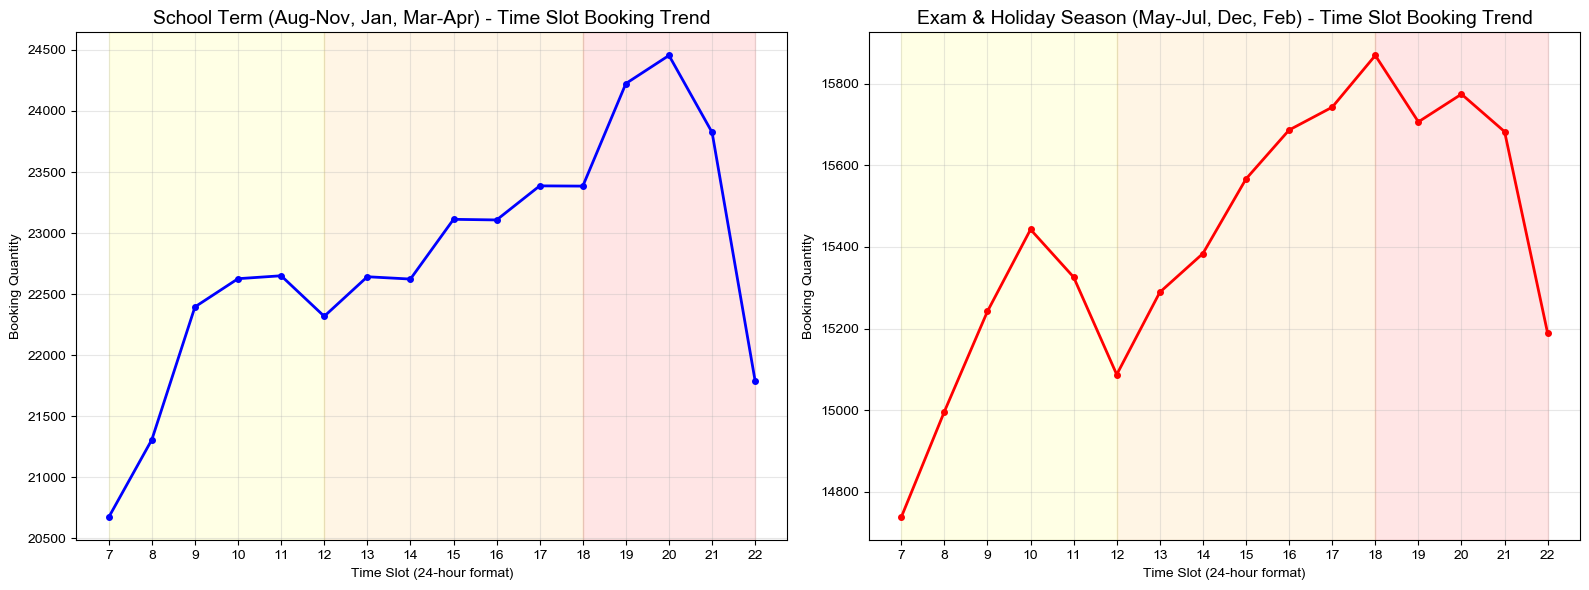

In [ ]:
# Ensure bookingDate is in datetime type
df_with_descriptions['bookingDate'] = pd.to_datetime(df_with_descriptions['bookingDate'])

# Extract month information
df_with_descriptions['month'] = df_with_descriptions['bookingDate'].dt.month

# Define school term schedule
school_periods = {
    'School Term (Aug-Nov, Jan, Mar-Apr)': [1, 3, 4, 8, 9, 10, 11],
    'Exam & Holiday Season (May-Jul, Dec, Feb)': [2, 5, 6, 7, 12]
}

# Create chart with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Draw line charts for each school period
colors = ['blue', 'red']

for i, (period_name, months) in enumerate(school_periods.items()):
    # Filter data for current period
    period_data = df_with_descriptions[df_with_descriptions['month'].isin(months)]
    
    # Count bookings for each time slot in this period
    period_time_counts = period_data['timeSlot'].value_counts().sort_index()
    
    # Ensure all time slots from 7-22 are included
    period_time_counts_full = period_time_counts.reindex(range(7, 23), fill_value=0)
    
    # Draw line in current subplot
    axes[i].plot(period_time_counts_full.index, period_time_counts_full.values, 
                 marker='o', linewidth=2, markersize=4, color=colors[i])
    
    # Set subplot properties
    axes[i].set_title(f'{period_name} - Time Slot Booking Trend', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Time Slot (24-hour format)', fontsize=10)
    axes[i].set_ylabel('Booking Quantity', fontsize=10)
    axes[i].set_xticks(range(7, 23))
    axes[i].grid(True, alpha=0.3)
    
    # Add background colors to distinguish different time periods
    axes[i].axvspan(7, 12, alpha=0.1, color='yellow')
    axes[i].axvspan(12, 18, alpha=0.1, color='orange')
    axes[i].axvspan(18, 22, alpha=0.1, color='red')
    
    # Mark highest and lowest points
    max_idx = period_time_counts_full.idxmax()
    min_idx = period_time_counts_full.idxmin()
    
    # Output period statistical summary
    print(f"\n=== {period_name} Time Slot Booking Statistics Summary ===")
    print(f"Busiest Time Slot: {max_idx}:00 ({period_time_counts_full[max_idx]} bookings)")
    print(f"Quietest Time Slot: {min_idx}:00 ({period_time_counts_full[min_idx]} bookings)")
    print(f"Average Bookings per Time Slot: {period_time_counts_full.mean():.0f}")
    print(f"Total Bookings: {period_time_counts_full.sum()}")
    
    # Calculate booking ratios for different time periods
    morning_bookings = period_time_counts_full[7:12].sum()  # 7:00-12:00
    afternoon_bookings = period_time_counts_full[12:18].sum()  # 12:00-18:00
    evening_bookings = period_time_counts_full[18:23].sum()  # 18:00-22:00

    total_bookings = period_time_counts_full.sum()
    print(f"Morning Bookings (7:00-12:00): {morning_bookings} ({morning_bookings/total_bookings*100:.1f}%)")
    print(f"Afternoon Bookings (12:00-18:00): {afternoon_bookings} ({afternoon_bookings/total_bookings*100:.1f}%)")
    print(f"Evening Bookings (18:00-22:00): {evening_bookings} ({evening_bookings/total_bookings*100:.1f}%)")

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

#### Based on the analysis above, organize the data to facilitate the subsequent machine learning section. The organization includes: selecting specific facilities for data visualization, separating date and time into individual columns, performing one-hot encoding for categorical variables, etc.

In [ ]:
selected_sports = ['Badminton', 'Tennis', 'Basketball', 'Squash']
selected_columns = ['timeSlot', 'bookingHour', 'bookingDayOfWeek', 'bookingMonth', 'facility_type', 'bookingStatus']


df = df_with_descriptions[
    (df_with_descriptions['facility_type'].isin(selected_sports))
][selected_columns]


In [ ]:
# unique_facility_types = df_with_descriptions['bookingStatus'].unique()
# print("Unique bookingStatus values:", unique_facility_types)
df['can_use'] = df_with_descriptions['bookingStatus'].isin(['A', 'U'])

In [ ]:
# Save the processed dataset to a CSV file
df.to_csv('machinelearning.csv', index=False, encoding='utf-8')

print(f"Dataset has been saved as 'machinelearning.csv'")
print(f"File contains {df.shape[0]} rows of data, {df.shape[1]} features")
print("Column names:", df.columns.tolist())

Dataset has been saved as 'machinelearning.csv'
File contains 422448 rows of data, 7 features
Column names: ['timeSlot', 'bookingHour', 'bookingDayOfWeek', 'bookingMonth', 'facility_type', 'bookingStatus', 'can_use']


Dataset basic information:
Data shape: (422448, 7)
Facility type distribution:
facility_type
Tennis        158254
Basketball    152164
Badminton      72108
Squash         39922
Name: count, dtype: int64
Booking success rate: 66.54%


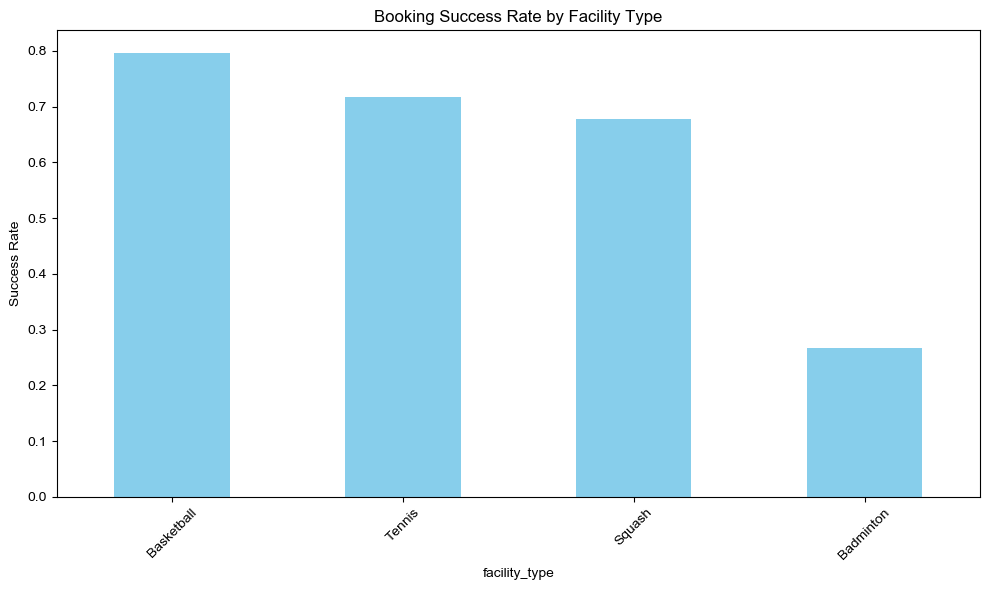

Feature engineering completed!
Number of features after processing: 18


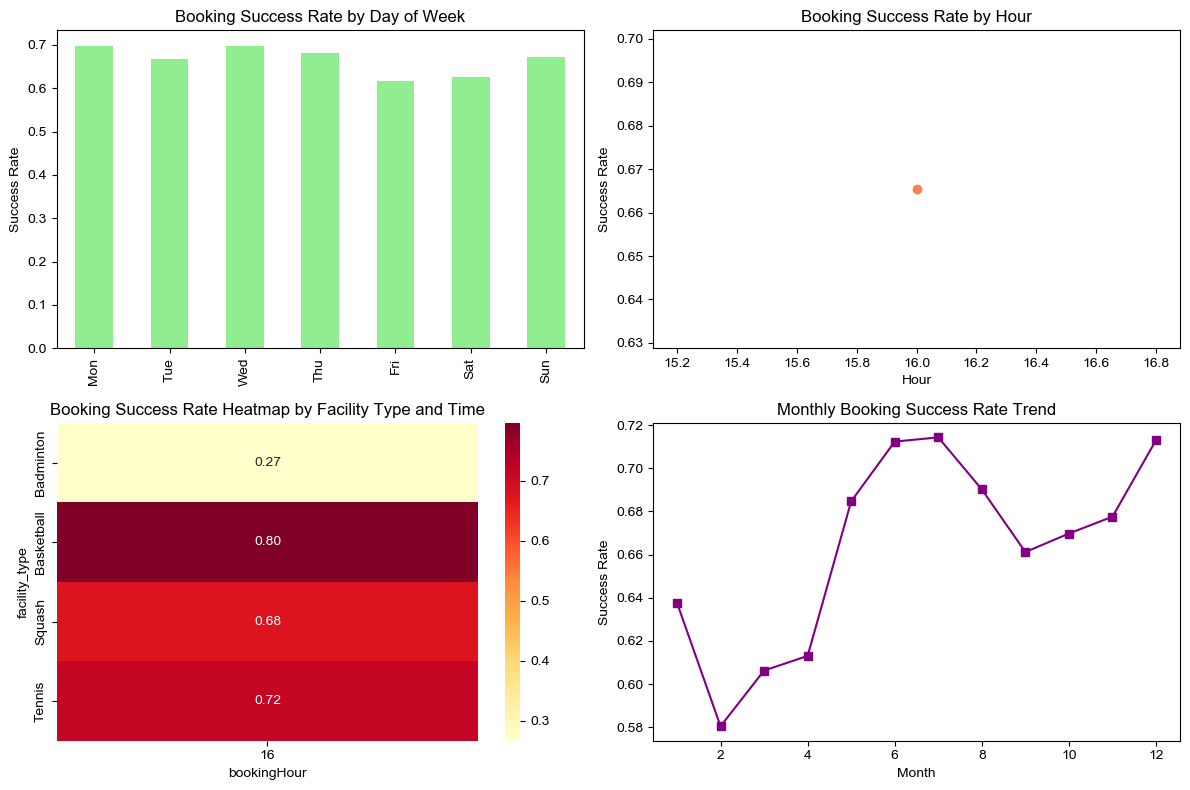

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


# 1. Exploratory Data Analysis
print("Dataset basic information:")
print(f"Data shape: {df.shape}")
print(f"Facility type distribution:\n{df['facility_type'].value_counts()}")
print(f"Booking success rate: {df['can_use'].mean():.2%}")

# Visualize booking success rate by facility type
plt.figure(figsize=(10, 6))
success_by_facility = df.groupby('facility_type')['can_use'].mean().sort_values(ascending=False)
success_by_facility.plot(kind='bar', color='skyblue')
plt.title('Booking Success Rate by Facility Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Feature Engineering
# Create time-related features
df_processed = df.copy()

# Time period features
df_processed['is_weekend'] = (df_processed['bookingDayOfWeek'] >= 5).astype(int)
df_processed['is_evening'] = ((df_processed['bookingHour'] >= 18) & (df_processed['bookingHour'] <= 22)).astype(int)
df_processed['is_morning'] = ((df_processed['bookingHour'] >= 7) & (df_processed['bookingHour'] <= 12)).astype(int)
df_processed['is_afternoon'] = ((df_processed['bookingHour'] >= 13) & (df_processed['bookingHour'] <= 17)).astype(int)

# Seasonal features
df_processed['is_summer'] = df_processed['bookingMonth'].isin([6, 7, 8]).astype(int)
df_processed['is_winter'] = df_processed['bookingMonth'].isin([12, 1, 2]).astype(int)

# Facility type encoding
le = LabelEncoder()
df_processed['facility_encoded'] = le.fit_transform(df_processed['facility_type'])

# Create one-hot encoding for facility types
facility_dummies = pd.get_dummies(df_processed['facility_type'], prefix='facility')
df_processed = pd.concat([df_processed, facility_dummies], axis=1)

print("Feature engineering completed!")
print(f"Number of features after processing: {df_processed.shape[1]}")

# 3. Data Analysis and Visualization
# Analyze booking success rate by day of week
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
success_by_weekday = df_processed.groupby('bookingDayOfWeek')['can_use'].mean()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
success_by_weekday.index = days[:len(success_by_weekday)]
success_by_weekday.plot(kind='bar', color='lightgreen')
plt.title('Booking Success Rate by Day of Week')
plt.ylabel('Success Rate')

# Analyze booking success rate by hour
plt.subplot(2, 2, 2)
success_by_hour = df_processed.groupby('bookingHour')['can_use'].mean()
success_by_hour.plot(kind='line', marker='o', color='coral')
plt.title('Booking Success Rate by Hour')
plt.ylabel('Success Rate')
plt.xlabel('Hour')

# Heatmap of time distribution by facility type
plt.subplot(2, 2, 3)
heatmap_data = df_processed.pivot_table(
    values='can_use', 
    index='facility_type', 
    columns='bookingHour', 
    aggfunc='mean'
)
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Booking Success Rate Heatmap by Facility Type and Time')

plt.subplot(2, 2, 4)
# Monthly trend
monthly_trend = df_processed.groupby('bookingMonth')['can_use'].mean()
monthly_trend.plot(kind='line', marker='s', color='purple')
plt.title('Monthly Booking Success Rate Trend')
plt.ylabel('Success Rate')
plt.xlabel('Month')

plt.tight_layout()
plt.show()